<a href="https://colab.research.google.com/github/DijanaLazic/MIEP/blob/main/MIEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch torchvision

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generator klasa sa većim kapacitetom
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, 2048, 4, 1, 0, bias=False),
            nn.BatchNorm2d(2048),
            nn.ReLU(True),
            nn.ConvTranspose2d(2048, 1024, 4, 2, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(True),
            nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn.Tanh(),
            nn.Conv2d(1, 1, kernel_size=5, padding=2)  # Dodavanje konvolucionog sloja
        )

    def forward(self, input):
        return self.main(input)

# Discriminator klasa sa LeakyReLU sa većom negativnom nagibom
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.3, inplace=True),  # Povećana negativna nagiba
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.3, inplace=True),  # Povećana negativna nagiba
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.3, inplace=True),  # Povećana negativna nagiba
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.3, inplace=True),  # Povećana negativna nagiba
            nn.Conv2d(512, 1, 4, 1, 0, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, input):
        out = self.main(input)
        return self.sigmoid(out.view(-1))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ključevi u state_dict: odict_keys(['main.0.weight_orig', 'main.0.weight_u', 'main.0.weight_v', 'main.2.weight_orig', 'main.2.weight_u', 'main.2.weight_v', 'main.3.weight', 'main.3.bias', 'main.3.running_mean', 'main.3.running_var', 'main.3.num_batches_tracked', 'main.5.weight_orig', 'main.5.weight_u', 'main.5.weight_v', 'main.6.weight', 'main.6.bias', 'main.6.running_mean', 'main.6.running_var', 'main.6.num_batches_tracked', 'main.8.weight_orig', 'main.8.weight_u', 'main.8.weight_v', 'main.9.weight', 'main.9.bias', 'main.9.running_mean', 'main.9.running_var', 'main.9.num_batches_tracked', 'main.11.weight_orig', 'main.11.weight_u', 'main.11.weight_v'])
Ključevi u modelu: odict_keys(['main.0.weight', 'main.2.weight', 'main.3.weight', 'main.3.bias', 'main.3.running_mean', 'main.3.running_var', 'main.3.num_batches_tracked', 'main.5.weight', 'main.6.weight', 'main.6.bias', 'main.6.running_mean', 'main.6.running_var', 'main.6.num_batches_tracked', 'main.8.weight', 'main.9.weight', 'main.9.bi

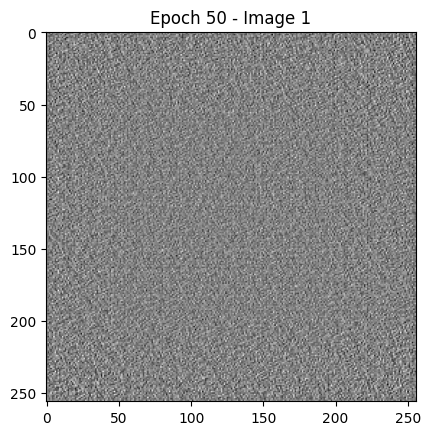

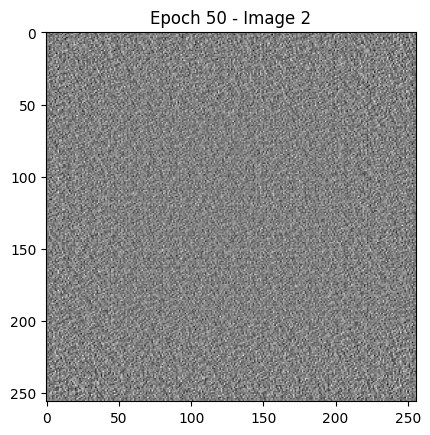

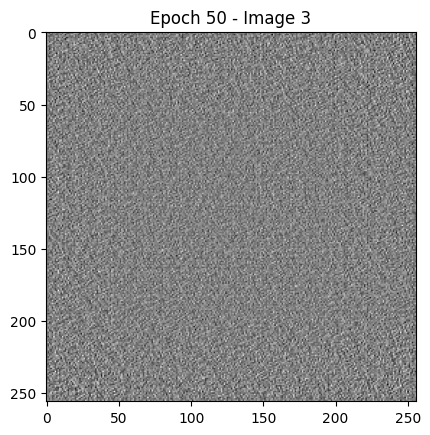

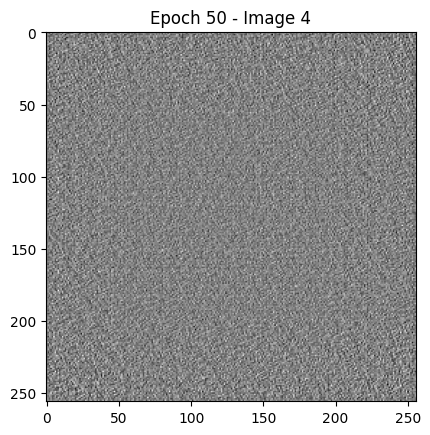

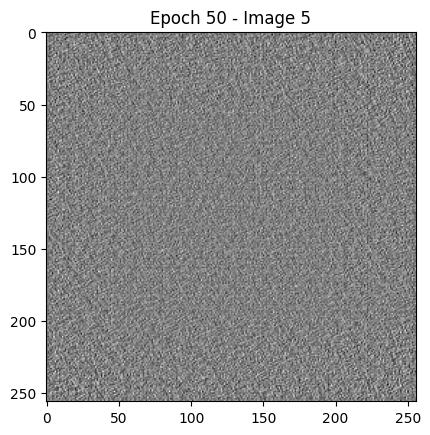

In [10]:
import torch
import matplotlib.pyplot as plt

# Inicijalizacija modela

nz = 100  # Veličina latentnog vektora
# Učitavanje state_dict
state_dict = torch.load("/content/drive/MyDrive/MIESProjekat/netD_epoch_23.pth", weights_only=True)

# Prikazivanje ključeva u state_dict
print("Ključevi u state_dict:", state_dict.keys())

# Prikazivanje ključeva u modelu


# Učitaj state_dict
state_dict = torch.load("/content/drive/MyDrive/MIESProjekat/netD_epoch_23.pth", weights_only=True)

# Prilagodi ključeve (primer: ukloni '_orig', '_u', '_v' sa ključeva)
adjusted_state_dict = {}
for key in state_dict.keys():
    new_key = key
    if '_orig' in key:
        new_key = key.replace('_orig', '')
    elif '_u' in key:
        new_key = key.replace('_u', '')
    elif '_v' in key:
        new_key = key.replace('_v', '')
    adjusted_state_dict[new_key] = state_dict[key]

# Učitaj prilagođeni state_dict u model



# Učitavanje modela iz 20. epohe
netG_20 = Generator(nz)
netD_20 = Discriminator()
netG_20.load_state_dict(torch.load("/content/drive/MyDrive/MIESProjekat/netG_epoch_23.pth", weights_only=True))
#netD_20.load_state_dict(torch.load("/content/drive/MyDrive/MIESProjekat/netD_epoch_23.pth", weights_only=True))


# Prikazivanje ključeva u modelu
print("Ključevi u modelu:", netD_20.state_dict().keys())
netG_20.eval()
netD_20.eval()

# Učitavanje modela iz 50. epohe
netG_50 = Generator(nz)
netD_50 = Discriminator()
netG_50.load_state_dict(torch.load("/content/drive/MyDrive/MIESProjekat/netG_epoch_48.pth", weights_only=True))
#netD_50.load_state_dict(torch.load("/content/drive/MyDrive/MIESProjekat/netD_epoch_44.pth", weights_only=True))
netG_50.eval()
#netD_50.eval()

# Funkcija za generisanje slika za date modele
def generate_images(netG, epoch_label, num_images=5):
    with torch.no_grad():
        for i in range(num_images):
            noise = torch.randn(1, nz, 1, 1)  # Random vektor za generator
            fake_image = netG(noise).squeeze().cpu().numpy()
            plt.imshow(fake_image, cmap='gray')
            plt.title(f"Epoch {epoch_label} - Image {i+1}")
            plt.show()

# Generisanje i prikazivanje slika za 20. epohu
#print("Generisane slike za 20. epohu:")
#generate_images(netG_20, epoch_label=20)

# Generisanje i prikazivanje slika za 50. epohu
print("Generisane slike za 50. epohu:")
generate_images(netG_50, epoch_label=50)

In [12]:
netG_50.load_state_dict(torch.load("/content/drive/MyDrive/MIESProjekat/netG_epoch_23.pth"))
netG_50.eval()


<ipython-input-12-48dcb958cc0e>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  netG_50.load_state_dict(torch.load("/content/drive/MyDrive/MIESProjekat/netG_epoch_23.pth"))

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 2048, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(2048, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Ba

In [13]:
# Definiši uređaj (CPU ili GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Postavi modele na uređaj
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

# Učitaj stanja modela
netG.load_state_dict(torch.load("/content/drive/MyDrive/MIESProjekat/netG_epoch_23.pth", map_location=device))

netG.eval()


<ipython-input-13-79b70215240b>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  netG.load_state_dict(torch.load("/content/drive/MyDrive/MIESProjekat/netG_epoch_23.pth", map

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 2048, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(2048, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Ba

In [14]:
import torchvision.utils as vutils

# Generiši uzorke koristeći Generator
with torch.no_grad():
    noise = torch.randn(64, nz, 1, 1, device=device)
    generated_images = netG(noise)
    # Sačuvaj generisane slike
    vutils.save_image(generated_images, "generated_images_epoch_50.png", normalize=True)